In [50]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Reconfirm that python 3.8.8 is the correct version.

# Load original dataset
F_data = pd.read_csv('data.csv',usecols=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15"])
Res_label = pd.read_csv('data.csv',usecols=["Label"])
Res_label = Res_label['Label'].values


# print(F_data)
# print("after")
# # drop invalid data out
# for index, row in F_data.iterrows():
#     # Iterate over each column of the row
#     for column in F_data.columns:
#         # Get the element at the current row and column
#         element = F_data.loc[index, column]
#         if element >= 1:
#             F_data = F_data.drop(index)
#             break
#     # End of the for loop of column
# # End of the for loop of rows

# print(F_data)


In [51]:
# Normalize the data in column manners
F_Normalized = F_data
for column in F_data.columns:
    F_Normalized[column] = F_Normalized[column]  / F_Normalized[column].abs().max()

# Apply PCA
pc_num = 2
PC_project = PCA(n_components=pc_num)
PC_project.fit(F_Normalized)
Reduced = PC_project.transform(F_Normalized)
print("Reduced components are:", Reduced)

Reduced components are: [[-0.54804487 -0.98024676]
 [-0.30624511 -0.81382833]
 [-0.42926907 -0.14572304]
 ...
 [-1.24823629  0.18862065]
 [-0.01342011 -0.40626597]
 [ 0.0256331  -0.40925964]]


In [52]:
# SVM classifier

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(Reduced, Res_label, test_size=0.1, random_state=0)

# Apply SVM for classification as 'SVMclassifier'
SVMclassifier = SVC(kernel='poly')
SVMclassifier.fit(x_train, y_train)

# Test & print
SVM_pred = SVMclassifier.predict(x_test)
print('SVM accuracy: %.4f' % accuracy_score(y_test, SVM_pred))

SVM accuracy: 0.6280


In [53]:
# Decission Tree Classifier 'Tree'
Tree = DecisionTreeClassifier(random_state=2*pc_num)
# We keep on using the training & testing set from above
Tree.fit(x_train, y_train)

# Apply tree for prediction
Tree_pred = Tree.predict(x_test)
print('Decision tree accuracy: %.4f' % accuracy_score(y_test, Tree_pred))

Decision tree accuracy: 0.6112


In [54]:
# Multi-layer perceptrons classifier 'MLPc'
MLPc = MLPClassifier(hidden_layer_sizes=(6,4), max_iter=50)
# We keep on using the training & testing set from above
MLPc.fit(x_train, y_train)

# Apply MLPc for prediction
MLPc_pred = MLPc.predict(x_test)
print('Decision tree accuracy: %.4f' % accuracy_score(y_test, MLPc_pred))

Decision tree accuracy: 0.6411


e:\anaconda\install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


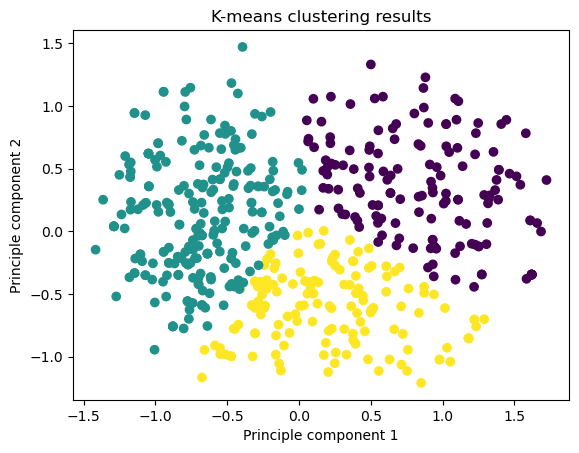

In [63]:
# Unsupervised learning, K-means classifier 'Kmean'
# This is an unsupervised process so only training set is needed.
Kmean = KMeans(n_clusters=3).fit(x_train)

Kmean_res = Kmean.predict(x_test)

# Plot the data points with their cluster assignments
from mpl_toolkits.mplot3d import Axes3D
plt.scatter(x_test[:, 0], x_test[:, 1], c=Kmean_res)
plt.title('K-means clustering results')
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()
# In the plot, different color for different cluster